# Part 3

In [312]:
# import modules & libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [313]:
# importing prev dataset generated and Variables data

results = pd.read_csv('final_2.csv')
data_pob = pd.read_csv('./data/compiled_metrics.csv')
data_air = pd.read_csv('./data/quality_air_compiled.csv')
day_det = pd.read_csv('./data/day_inf_dectectec.csv')
data_area = pd.read_csv('./data/km2_world_all.csv')

results = results.set_index('location')

In [314]:
# Checking Datasets
results.head()


,L,k,a,R2,lat,lng,Population
location,,,,,,,
Ch-Hubei,67566.862576,0.235949,18.662484,0.992065,30.861038,30.861038,59020000.0
South Korea,7560.810155,0.373457,39.072092,0.998869,35.907757,127.766922,51635256.0
Italy,5194.905568,0.389753,41.080996,0.998733,41.871941,12.567380,60431283.0
Iran,5008.498814,0.581870,41.368524,0.998730,32.427910,53.688046,81800269.0
Ch-Guangdong,1339.457777,0.283284,11.667614,0.998564,22.993891,22.993891,113460000.0


In [315]:
data_pob.head()

,Region,location_adj,Male_population,Over_65,Foreign_turism,health_exp_usd
0,Beijing,Ch-Beijing,8781000.0,1989000.0,3400000.0,998.400000
1,Tianjin,Ch-Tianjin,6863000.0,1397000.0,560000.0,925.440221
2,Hebei,Ch-Hebei,31210000.0,7854000.0,750000.0,811.490834
3,Shanxi,Ch-Shanxi,15593000.0,3147000.0,470000.0,754.559227
4,Inner Mongolia,Ch-Inner Mongolia,10608000.0,2047000.0,1790000.0,709.260970


In [316]:
data_air.head()

,location,location_adj,COU,Country,MAREG,Macroregion,MIREG,Microregion,VAR,Variable,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Air_Pm2.5,Flag Codes,Flags
0,Australia,Australia,AUS,Australia,TOTAL,-Total-,TOTAL,-Total-,PWM_EX,Mean population exposure to PM2.5,...,2017,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,8.52437,NaN,NaN
1,Austria,Austria,AUT,Austria,TOTAL,-Total-,TOTAL,-Total-,PWM_EX,Mean population exposure to PM2.5,...,2017,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,12.68774,NaN,NaN
2,Belgium,Belgium,BEL,Belgium,TOTAL,-Total-,TOTAL,-Total-,PWM_EX,Mean population exposure to PM2.5,...,2017,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,13.09935,NaN,NaN
3,Canada,Canada,CAN,Canada,TOTAL,-Total-,TOTAL,-Total-,PWM_EX,Mean population exposure to PM2.5,...,2017,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,6.45931,NaN,NaN
4,Czech Republic,Czech Republic,CZE,Czech Republic,TOTAL,-Total-,TOTAL,-Total-,PWM_EX,Mean population exposure to PM2.5,...,2017,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,16.21481,NaN,NaN


In [317]:
day_det.head()

,location,Day_inf_detected
0,Ch-Hubei,1
1,South Korea,1
2,Italy,10
3,Iran,29
4,Ch-Guangdong,1


In [318]:
data_area2= data_area.set_index('location')
data_area2.head()

,km2
location,
Ch-Anhui,140200.0
Ch-Beijing,16808.0
Ch-Chongqing,82300.0
Ch-Fujian,121400.0
Ch-Guangdong,177900.0


In [319]:
data_area2= data_area.set_index('location')
data_air2 = data_air[['location_adj','Air_Pm2.5']].set_index('location_adj')
data_pob2 = data_pob.drop('Region',axis=1).set_index('location_adj')
day_det2 = day_det.set_index('location')

In [320]:
res2 = results.join(data_area2).join(data_air2)
res2

,L,k,a,R2,lat,lng,Population,km2,Air_Pm2.5
location,,,,,,,,,
Ch-Hubei,67566.862576,0.235949,18.662484,0.992065,30.861038,30.861038,59020000.0,185900.0,59.254700
South Korea,7560.810155,0.373457,39.072092,0.998869,35.907757,127.766922,51635256.0,100210.0,25.138890
Italy,5194.905568,0.389753,41.080996,0.998733,41.871941,12.567380,60431283.0,301338.0,16.497100
Iran,5008.498814,0.581870,41.368524,0.998730,32.427910,53.688046,81800269.0,1648000.0,48.950000
Ch-Guangdong,1339.457777,0.283284,11.667614,0.998564,22.993891,22.993891,113460000.0,177900.0,34.465890
Ch-Henan,1269.816707,0.283431,12.677123,0.998799,34.199126,34.199126,94000000.0,167000.0,75.389510
Ch-Zhejiang,1190.682502,0.321670,10.420335,0.996094,29.298788,29.298788,57370000.0,101800.0,44.766770
Ch-Hunan,1017.394741,0.285767,11.901684,0.998218,27.658509,27.658509,67370000.0,210000.0,48.635940
Ch-Anhui,994.105342,0.280972,13.357285,0.999329,31.771152,31.771152,62000000.0,140200.0,57.406660


In [321]:
res3 = res2.join(data_pob2)

In [322]:
res3

,L,k,a,R2,lat,lng,Population,km2,Air_Pm2.5,Male_population,Over_65,Foreign_turism,health_exp_usd
location,,,,,,,,,,,,,
Ch-Hubei,67566.862576,0.235949,18.662484,0.992065,30.861038,30.861038,59020000.0,185900.0,59.254700,24973000.0,6059000.0,3070000.0,590.141205
South Korea,7560.810155,0.373457,39.072092,0.998869,35.907757,127.766922,51635256.0,100210.0,25.138890,25860546.0,7445058.0,15347000.0,2711.738257
Italy,5194.905568,0.389753,41.080996,0.998733,41.871941,12.567380,60431283.0,301338.0,16.497100,29383702.0,13749132.0,61567200.0,3427.306466
Iran,5008.498814,0.581870,41.368524,0.998730,32.427910,53.688046,81800269.0,1648000.0,48.950000,41358928.0,5058998.0,7295000.0,1563.751678
Ch-Guangdong,1339.457777,0.283284,11.667614,0.998564,22.993891,22.993891,113460000.0,177900.0,34.465890,50209000.0,7687000.0,8620000.0,564.806353
Ch-Henan,1269.816707,0.283431,12.677123,0.998799,34.199126,34.199126,94000000.0,167000.0,75.389510,39815000.0,8698000.0,1050000.0,604.848058
Ch-Zhejiang,1190.682502,0.321670,10.420335,0.996094,29.298788,29.298788,57370000.0,101800.0,44.766770,24418000.0,6108000.0,3230000.0,641.529018
Ch-Hunan,1017.394741,0.285767,11.901684,0.998218,27.658509,27.658509,67370000.0,210000.0,48.635940,28469000.0,7057000.0,1790000.0,584.367616
Ch-Anhui,994.105342,0.280972,13.357285,0.999329,31.771152,31.771152,62000000.0,140200.0,57.406660,26667000.0,6840000.0,2190000.0,634.060694


In [399]:
res4 = res3.join(day_det2)
print(res4.shape)
res4

(33, 14)


,L,k,a,R2,lat,lng,Population,km2,Air_Pm2.5,Male_population,Over_65,Foreign_turism,health_exp_usd,Day_inf_detected
location,,,,,,,,,,,,,,
Ch-Hubei,67566.862576,0.235949,18.662484,0.992065,30.861038,30.861038,59020000.0,185900.0,59.254700,24973000.0,6059000.0,3070000.0,590.141205,1
South Korea,7560.810155,0.373457,39.072092,0.998869,35.907757,127.766922,51635256.0,100210.0,25.138890,25860546.0,7445058.0,15347000.0,2711.738257,1
Italy,5194.905568,0.389753,41.080996,0.998733,41.871941,12.567380,60431283.0,301338.0,16.497100,29383702.0,13749132.0,61567200.0,3427.306466,10
Iran,5008.498814,0.581870,41.368524,0.998730,32.427910,53.688046,81800269.0,1648000.0,48.950000,41358928.0,5058998.0,7295000.0,1563.751678,29
Ch-Guangdong,1339.457777,0.283284,11.667614,0.998564,22.993891,22.993891,113460000.0,177900.0,34.465890,50209000.0,7687000.0,8620000.0,564.806353,1
Ch-Henan,1269.816707,0.283431,12.677123,0.998799,34.199126,34.199126,94000000.0,167000.0,75.389510,39815000.0,8698000.0,1050000.0,604.848058,1
Ch-Zhejiang,1190.682502,0.321670,10.420335,0.996094,29.298788,29.298788,57370000.0,101800.0,44.766770,24418000.0,6108000.0,3230000.0,641.529018,1
Ch-Hunan,1017.394741,0.285767,11.901684,0.998218,27.658509,27.658509,67370000.0,210000.0,48.635940,28469000.0,7057000.0,1790000.0,584.367616,1
Ch-Anhui,994.105342,0.280972,13.357285,0.999329,31.771152,31.771152,62000000.0,140200.0,57.406660,26667000.0,6840000.0,2190000.0,634.060694,1


In [343]:
mex_row = res4.loc['Mexico']

y_L = res4['L'].drop('Mexico')
y_k = res4['k'].drop('Mexico')
y_a = res4['a'].drop('Mexico')

x_L = res4[['Population','Air_Pm2.5','Male_population','Over_65','health_exp_usd']]
x_k = res4[['L', 'km2','Air_Pm2.5','Population','Foreign_turism','health_exp_usd','Day_inf_detected']]
x_a = res4[['km2','Population','Day_inf_detected']]

In [344]:
mex_row

L                   5.464529e+00
k                   1.000000e+00
a                   3.769728e+01
R2                  9.709272e-01
lat                 2.363450e+01
lng                -1.025528e+02
Population          1.261908e+08
km2                 1.973000e+06
Air_Pm2.5           2.123615e+01
Male_population     6.172082e+07
Over_65             9.115625e+06
Foreign_turism      4.131300e+07
health_exp_usd      9.718232e+02
Day_inf_detected    3.800000e+01
Name: Mexico, dtype: float64

# Splitting Data

In [402]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_L_norm = scaler.fit_transform(x_L)
x_k_norm = scaler.fit_transform(x_k)
x_a_norm = scaler.fit_transform(x_a)

mex_L_test = x_L_norm[-1]
mex_k_test = x_k_norm[-1]
mex_a_test = x_a_norm[-1]

x_L_data = x_L_norm[:-1]
x_k_data = x_k_norm[:-1]
x_a_data = x_a_norm[:-1]


In [403]:
x_L_norm

array([[1.66023482e-01, 6.87343102e-01, 1.30072879e-04, 1.04994759e-04,
        1.41353423e-02],
       [1.43055882e-01, 2.35448861e-01, 1.59728636e-01, 1.43945862e-01,
        2.39533774e-01],
       [1.70412772e-01, 1.20980667e-01, 1.81492838e-01, 2.65841761e-01,
        3.15555727e-01],
       [2.36873347e-01, 5.50848187e-01, 2.55469478e-01, 9.78088831e-02,
        1.17571701e-01],
       [3.35339597e-01, 3.58993270e-01, 2.85967596e-04, 1.36473851e-04,
        1.14437681e-02],
       [2.74816239e-01, 9.01063009e-01, 2.21758938e-04, 1.56022599e-04,
        1.56977981e-02],
       [1.60891748e-01, 4.95437586e-01, 1.26644381e-04, 1.05942226e-04,
        1.95947826e-02],
       [1.91993165e-01, 5.46688183e-01, 1.51669325e-04, 1.24292139e-04,
        1.35219564e-02],
       [1.75291704e-01, 6.62864169e-01, 1.40537518e-04, 1.20096215e-04,
        1.88013480e-02],
       [1.23041324e-01, 4.34904004e-01, 9.67515874e-05, 5.95163663e-05,
        1.71107220e-02],
       [2.94938856e-01, 8.3484

In [405]:
italy_L_test = x_L_norm[2]
italy_k_test = x_k_norm[2]
italy_a_test = x_a_norm[2]

iran_L_test = x_L_norm[3]
iran_k_test = x_k_norm[3]
iran_a_test = x_a_norm[3]

In [406]:
print(y_L.shape)
print(y_k.shape)
print(y_a.shape)

print(x_data.shape)
print(mex_test.shape)

# Shapes OK!

(32,)
(32,)
(32,)
(32, 7)
(7,)


In [464]:
from sklearn.model_selection import train_test_split

# Splitting for L
X_train_L, X_test_L, y_train_L, y_test_L = train_test_split(x_L_data, y_L, test_size=0.08)

# Splitting for k
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(x_k_data, y_k, test_size=0.08)

# Splitting for a
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(x_a_data, y_a, test_size=0.08)


In [465]:
#pd.DataFrame(x_norm)

# Creating models to predict L, k, a

In [466]:
# Models to Try:
# - RandomForest
# - LinearRegression
# - Lasso
# - ElasticNet
# - RidgeRegression
# - SVR
# - EnsembleRegressors

from sklearn.metrics import r2_score    #r2_score(y_true, y_pred)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


In [467]:
y_test_L.values

array([334.71865189, 170.24721721, 147.86260611])

## Modelling for L

In [468]:
# Linear Regression
mod_L_linear = LinearRegression()
mod_L_linear.fit(X_train_L, y_train_L)
print(mod_L_linear.score(X_train_L, y_train_L))
y_pred_L = mod_L_linear.predict(X_test_L)
print(r2_score(y_test_L.values, y_pred_L))

0.5670318990559182
-3583.580284383773


In [471]:
# Random Forest
mod_L_ranfor = RandomForestRegressor()
mod_L_ranfor.fit(X_train_L, y_train_L)
print(mod_L_ranfor.score(X_train_L, y_train_L))
y_pred_L = mod_L_ranfor.predict(X_test_L)
print(r2_score(y_test_L.values, y_pred_L))

0.865299098221433
-4.378880989775953


In [470]:
# Lasso
mod_L_lasso = Lasso()
mod_L_lasso.fit(X_train_L, y_train_L)
print(mod_L_lasso.score(X_train_L, y_train_L))
y_pred_L = mod_L_lasso.predict(X_test_L)
print(r2_score(y_test_L.values, y_pred_L))

0.5670286675039884
-3567.582937681152


In [434]:
# ElasticNet
mod_L_elNet = ElasticNet()
mod_L_elNet.fit(X_train_L, y_train_L)
print(mod_L_elNet.score(X_train_L, y_train_L))
y_pred_L = mod_L_elNet.predict(X_test_L)
print(r2_score(y_test_L.values, y_pred_L))

0.3327116325241586
-0.5060268296017545


In [435]:
#RidgeRegression
mod_L_ridge = Ridge()
mod_L_ridge.fit(X_train_L, y_train_L)
print(mod_L_ridge.score(X_train_L, y_train_L))
y_pred_L = mod_L_ridge.predict(X_test_L)
print(r2_score(y_test_L.values, y_pred_L))

0.7858749503869786
-0.6247118934061193


In [436]:
#SVR
mod_L_SVR = SVR()
mod_L_SVR.fit(X_train_L, y_train_L)
print(mod_L_SVR.score(X_train_L, y_train_L))
y_pred_L = mod_L_SVR.predict(X_test_L)
print(r2_score(y_test_L.values, y_pred_L))

-0.04623137348943396
-0.6106201501199078


In [472]:
y_pred_L

array([423.24033275, 418.07184132, 354.61828262])

In [473]:
y_test_L.values

array([334.71865189, 170.24721721, 147.86260611])

## Modelling for k

In [474]:
# Linear Regression
mod_k_linear = LinearRegression()
mod_k_linear.fit(X_train_k, y_train_k)
print(mod_k_linear.score(X_train_k, y_train_k))
y_pred_k = mod_k_linear.predict(X_test_k)
print(r2_score(y_test_k.values, y_pred_k))

0.7050900106356472
-0.35835209795896805


In [478]:
# Random Forest
mod_k_ranfor = RandomForestRegressor()
mod_k_ranfor.fit(X_train_k, y_train_k)
print(mod_k_ranfor.score(X_train_k, y_train_k))
y_pred_k = mod_k_ranfor.predict(X_test_k)
print(r2_score(y_test_k.values, y_pred_k))

0.8768652640632884
-0.6046684617651359


In [364]:
# Lasso
mod_k_lasso = Lasso()
mod_k_lasso.fit(X_train_k, y_train_k)
print(mod_k_lasso.score(X_train_k, y_train_k))
y_pred_k = mod_k_lasso.predict(X_test_k)
print(r2_score(y_test_k.values, y_pred_k))

0.0
-2.3224321695788896


In [365]:
#SVR
mod_k_SVR = SVR()
mod_k_SVR.fit(X_train_k, y_train_k)
print(mod_k_SVR.score(X_train_k, y_train_k))
y_pred_k = mod_k_SVR.predict(X_test_k)
print(r2_score(y_test_k.values, y_pred_k))

0.4678034426894989
-2.4612556399390244


In [479]:
y_pred_k

array([0.25652881, 0.26184681, 0.26848625])

In [480]:
y_test_k.values

array([0.27362307, 0.2559379 , 0.14757185])

 ## Modelling for a

In [486]:
# Linear Regression
mod_a_linear = LinearRegression()
mod_a_linear.fit(X_train_a, y_train_a)
print(mod_a_linear.score(X_train_a, y_train_a))
y_pred_a = mod_a_linear.predict(X_test_a)
print(r2_score(y_test_a.values, y_pred_a))

0.7636708637512571
-18.28536665191804


In [494]:
# Random Forest
mod_a_ranfor = RandomForestRegressor()
mod_a_ranfor.fit(X_train_a, y_train_a)
print(mod_a_ranfor.score(X_train_a, y_train_a))
y_pred_a = mod_a_ranfor.predict(X_test_a)
print(r2_score(y_test_a.values, y_pred_a))

0.9017533893505644
-5.57124301880202


In [488]:
# Lasso
mod_a_lasso = Lasso()
mod_a_lasso.fit(X_train_a, y_train_a)
print(mod_a_lasso.score(X_train_a, y_train_a))
y_pred_a = mod_a_lasso.predict(X_test_a)
print(r2_score(y_test_a.values, y_pred_a))

0.5802216626073602
-42.07474317029148


In [489]:
#SVR
mod_a_SVR = SVR()
mod_a_SVR.fit(X_train_a, y_train_a)
print(mod_a_SVR.score(X_train_a, y_train_a))
y_pred_a = mod_a_SVR.predict(X_test_a)
print(r2_score(y_test_a.values, y_pred_a))

-0.07754901134604575
-1.5249214003064266


In [492]:
y_pred_a

array([14.25299716, 17.50360857, 11.95004887])

In [493]:
y_test_a.values

array([14.94097548, 13.53688965, 13.1079516 ])

# Getting Values for Mexico

In [495]:
mex_test

array([0.37493415, 0.1837536 , 0.38125453, 0.17624803, 0.49802041,
       0.05468523, 1.        ])

In [496]:
mex_pred_L = mod_L_ranfor.predict([mex_L_test])
mex_pred_k = mod_k_ranfor.predict([mex_k_test])
mex_pred_a = mod_a_linear.predict([mex_a_test])
print(mex_pred_L)
print(mex_pred_k)
print(mex_pred_a)

[4355.53023903]
[0.50462937]
[64.30398725]


In [497]:
def func(x, L, k, a):
    return L/(1 + np.exp(-k*(x-a)))

In [498]:
conf_ts = pd.read_csv('conf_ts.csv')


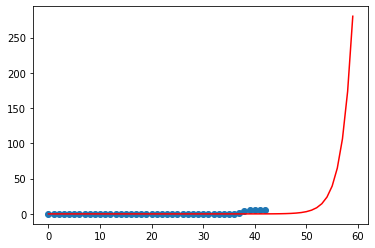

In [499]:
x1 = np.arange(len(conf_ts['South Korea']))
x2 = np.arange(60)
plt.scatter(x1, conf_ts.Mexico)
plt.plot(x2, func(x2, mex_pred_L, mex_pred_k, mex_pred_a), 'r-')


:0 <  si salio masomenos )